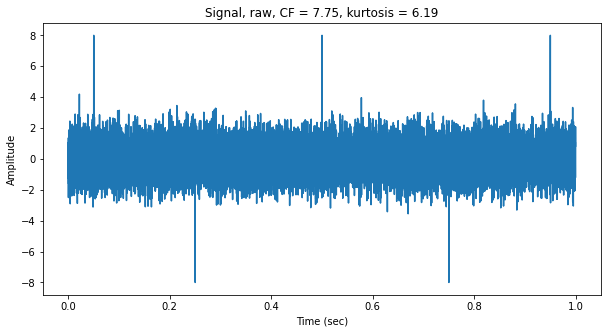

In [25]:
import numpy as np
import matplotlib.pyplot as plt
#import butterworth filter
from scipy.signal import butter, lfilter, freqz

# generate 1 sec signal fs 20khz random noise
fs = 20000
t = np.arange(0,1,1/fs)
x = np.random.randn(len(t))
pk = 8
# add 5 spikes to signal of twice amplitude
x[1000:1004] = pk
x[5000:5004] = -pk
x[10000:10004] = pk
x[15000:15004] = -pk
x[19000:19004] = pk

# calc crest factor
cf = np.max(np.abs(x))/np.sqrt(np.mean(np.square(x)))
# get kurtosis
k = np.mean(np.power(x,4))/np.power(np.mean(np.square(x)),2)
# plot signal
plt.figure(figsize=(10,5))
plt.plot(t,x)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
# title with crest factor and kurtosis
plt.title('Signal, raw, CF = ' + str(np.round(cf,2)) + ', kurtosis = ' + str(np.round(k,2)))
plt.show()


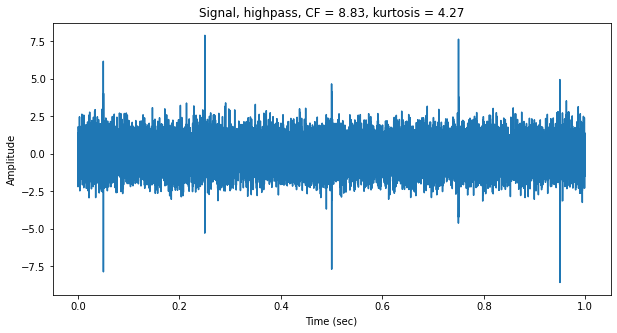

In [26]:
#highpass filteer with 1khz cutoff
fc = 1000
b, a = butter(4, fc/(fs/2), 'highpass')
y = lfilter(b, a, x)
#crest factor
cf = np.max(np.abs(y))/np.sqrt(np.mean(np.square(y)))
# get kurtosis
k = np.mean(np.power(y,4))/np.power(np.mean(np.square(y)),2)
plt.figure(figsize=(10,5))
plt.plot(t,y)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
# title with crest factor and kurtosis
plt.title('Signal, highpass, CF = ' + str(np.round(cf,2)) + ', kurtosis = ' + str(np.round(k,2)))
plt.show()
